In [84]:
#user-defined
import ipynb.fs.full.helper as hp

#dataframes
import pandas as pd
import h5py

#math
import numpy as np
import math
import scipy.fftpack
from scipy import signal
import scipy.interpolate

#gps
from geopy import distance

#plots
import pylab as plt
import matplotlib.pyplot as plt

In [85]:
#the complete bag6data
df=pd.read_hdf('~/data/2807/bag6/data6complete.h5')
hp.sync_time_origin(df)

,time,_analog_output_data,_imu_data_angular_velocity_x,_imu_data_angular_velocity_y,_imu_data_angular_velocity_z,_imu_data_angular_velocity_covariance_0,_imu_data_angular_velocity_covariance_1,_imu_data_angular_velocity_covariance_2,_imu_data_angular_velocity_covariance_3,_imu_data_angular_velocity_covariance_4,...,_ublox_gps_fix_velocity_twist_covariance_6,_ublox_gps_fix_velocity_twist_covariance_7,_ublox_gps_fix_velocity_twist_covariance_8,_ublox_gps_fix_velocity_twist_covariance_9,_ublox_gps_fix_velocity_twist_twist_angular_x,_ublox_gps_fix_velocity_twist_twist_angular_y,_ublox_gps_fix_velocity_twist_twist_angular_z,_ublox_gps_fix_velocity_twist_twist_linear_x,_ublox_gps_fix_velocity_twist_twist_linear_y,_ublox_gps_fix_velocity_twist_twist_linear_z
0,0.00,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00,0.171183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.01,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.01,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02,0.170870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399251,799.52,0.132081,0.001968,-0.001410,0.003282,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035
399252,799.52,0.131768,0.002590,-0.001250,0.004460,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035
399253,799.53,0.131977,0.003213,-0.001091,0.005639,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035
399254,799.53,0.132185,0.003835,-0.000932,0.006817,0.000003,0.0,0.0,0.0,0.000003,...,0.0,0.037636,0.0,0.0,0.0,0.0,0.0,-0.008,-0.043,0.035


Text(0, 0.5, 'Odor')

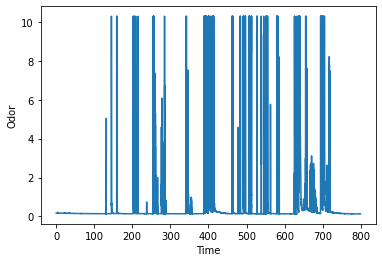

In [86]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(df.time, df._analog_output_data)
ax.set_xlabel('Time')
ax.set_ylabel('Odor')

#hp.plot_color(ax)

Text(0, 0.5, 'Frequency')

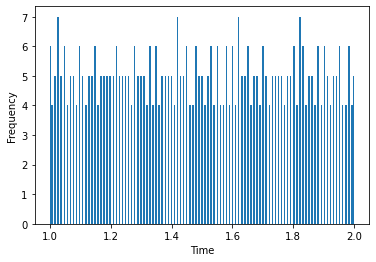

In [87]:
fig_t = plt.figure()

odx = fig_t.add_subplot(111)
bins = np.linspace(1,2,200)
odx.hist(df.time, bins=bins)
odx.set_xlabel('Time')
odx.set_ylabel('Frequency')

#hp.plot_color(odx)

In [88]:
#loading only odor data
odorname = '/home/flybot/data/2807/odor.hdf5'
of = hp.uncooperative_hdf5(odorname)
of.data = of.data.astype(float)
of

Dataset contains these keys: 
['analog_output']
Using only the first key:  analog_output


,data,t_secs,t_nsecs,t
0,0.170870,1595957763,649663705,1.595958e+09
1,0.171183,1595957763,654564510,1.595958e+09
2,0.170870,1595957763,664562819,1.595958e+09
3,0.170870,1595957763,664617371,1.595958e+09
4,0.170870,1595957763,674436704,1.595958e+09
...,...,...,...,...
159902,0.132394,1595958563,159710667,1.595959e+09
159903,0.132394,1595958563,164688882,1.595959e+09
159904,0.132394,1595958563,169675507,1.595959e+09
159905,0.131768,1595958563,174647127,1.595959e+09


In [89]:
start_time=of.t[0]
of.t=of.t-start_time

Text(0, 0.5, 'Frequency')

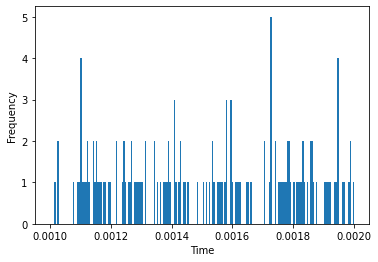

In [90]:
#histogram timestamp
df1=of.diff()
fig_t = plt.figure()

odx = fig_t.add_subplot(111)
bins = np.linspace(0.001,0.002,200)
odx.hist(df1.t, bins=bins)
odx.set_xlabel('Time')
odx.set_ylabel('Frequency')

#hp.plot_color(odx)

Text(0, 0.5, 'Odor')

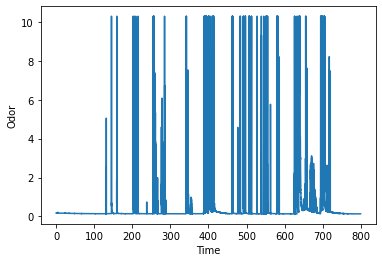

In [91]:
fig = plt.figure()

axis = fig.add_subplot(111)
axis.plot(of.t, of.data)
axis.set_xlabel('Time')
axis.set_ylabel('Odor')

#hp.plot_color(axis)

Text(0.08, 0.5, 'Odor Concentration')

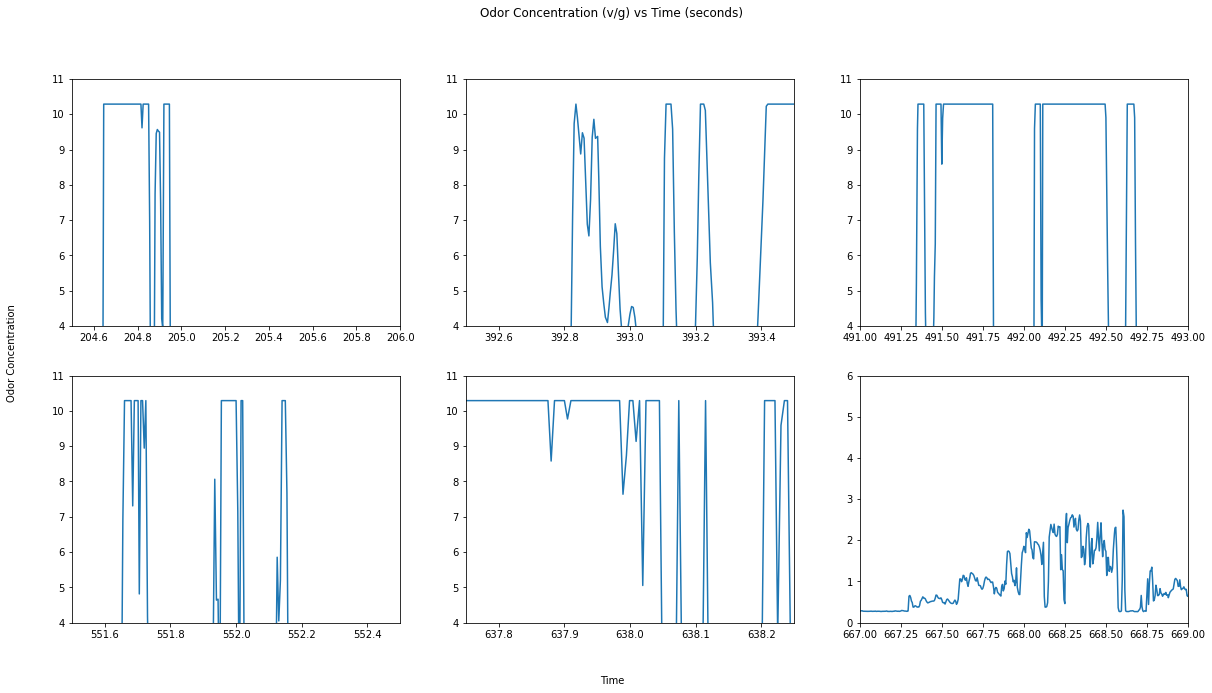

In [146]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3,figsize=(20,10))
fig.suptitle('Odor Concentration (v/g) vs Time (seconds)')
ax1.plot(of.t, of.data)
ax1.set_xlim(204.5,206) #time
ax1.set_ylim(4,11) #voltage

ax2.plot(of.t, of.data)
ax2.set_xlim(392.5,393.5)
ax2.set_ylim(4,11)

ax3.plot(of.t, of.data)
ax3.set_xlim(491,493)
ax3.set_ylim(4,11)

ax4.plot(of.t, of.data)
ax4.set_xlim(551.5,552.5)
ax4.set_ylim(4,11)

ax5.plot(of.t, of.data)
ax5.set_xlim(637.75,638.25)
ax5.set_ylim(4,11)

ax6.plot(of.t, of.data)
ax6.set_xlim(667,669)
ax6.set_ylim(0,6) #lower concentration

fig.text(0.5, 0.04, 'Time', ha='center')
fig.text(0.08, 0.5, 'Odor Concentration', va='center', rotation='vertical')

#hp.plot_color(ax1)
#hp.plot_color(ax2)
#hp.plot_color(ax6)